<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Create-the-datasets" data-toc-modified-id="Create-the-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create the datasets</a></span><ul class="toc-item"><li><span><a href="#NCWP" data-toc-modified-id="NCWP-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>NCWP</a></span></li><li><span><a href="#Nitrogen-Load" data-toc-modified-id="Nitrogen-Load-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Nitrogen Load</a></span></li><li><span><a href="#Nitrogen-Export" data-toc-modified-id="Nitrogen-Export-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Nitrogen Export</a></span></li><li><span><a href="#Rural-Population:" data-toc-modified-id="Rural-Population:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Rural Population:</a></span></li><li><span><a href="#Quantiles:" data-toc-modified-id="Quantiles:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Quantiles:</a></span></li></ul></li><li><span><a href="#2D-Scale-for-Data-Global" data-toc-modified-id="2D-Scale-for-Data-Global-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2D Scale for Data Global</a></span></li></ul></div>

# Imports

In [63]:
import fiona
import pandas as pd
import geopandas as gpd
import csv
import seaborn as sns
import numpy as np

In [64]:
from collections import OrderedDict
name_of_file = 'water_1d_outputs_md5_6af4c7347dfbcdc8cf9b5daf80ac8909.gpkg'

layers = fiona.listlayers(name_of_file)
layers

['grid_1_degree']

# Data exploration

In [65]:
# all_datasets = dict()

data = gpd.read_file(name_of_file, layer='grid_1_degree')
data.head()

,water_cur_n_export_degree,water_ssp5_n_export_degree,water_cur_n_load_degree,water_ssp1_n_load_degree,water_ssp1_n_export_degree,water_cur_rural_pop_degree,water_ssp5_n_load_degree,water_ssp5_rural_pop_degree,water_ssp3_n_export_degree,water_ssp3_n_load_degree,...,water_ssp3_rural_pop_degree,water_cur_nc_degree,water_cur_c_n_export_degree,water_ssp1_nc_degree,water_ssp1_c_n_export_degree,water_ssp3_nc_degree,water_ssp3_c_n_export_degree,water_ssp5_nc_degree,water_ssp5_c_n_export_degree,geometry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-179 89, -180 89, -180 90, -179 90, ..."
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-178 89, -179 89, -179 90, -178 90, ..."
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-177 89, -178 89, -178 90, -177 90, ..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-176 89, -177 89, -177 90, -176 90, ..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-175 89, -176 89, -176 90, -175 90, ..."


In [66]:
def poly_to_lat_long(poly):

    lats = list(poly.exterior.coords.xy[0])
    longs = list(poly.exterior.coords.xy[1])
    return list(zip(lats, longs))

In [67]:
data['geometry'] = data['geometry'].apply(lambda x: poly_to_lat_long(x))

In [68]:
data.head(1)

,water_cur_n_export_degree,water_ssp5_n_export_degree,water_cur_n_load_degree,water_ssp1_n_load_degree,water_ssp1_n_export_degree,water_cur_rural_pop_degree,water_ssp5_n_load_degree,water_ssp5_rural_pop_degree,water_ssp3_n_export_degree,water_ssp3_n_load_degree,...,water_ssp3_rural_pop_degree,water_cur_nc_degree,water_cur_c_n_export_degree,water_ssp1_nc_degree,water_ssp1_c_n_export_degree,water_ssp3_nc_degree,water_ssp3_c_n_export_degree,water_ssp5_nc_degree,water_ssp5_c_n_export_degree,geometry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,"[(-179.0, 89.0), (-180.0, 89.0), (-180.0, 90.0..."


In [69]:
data.columns

Index(['water_cur_n_export_degree', 'water_ssp5_n_export_degree',
       'water_cur_n_load_degree', 'water_ssp1_n_load_degree',
       'water_ssp1_n_export_degree', 'water_cur_rural_pop_degree',
       'water_ssp5_n_load_degree', 'water_ssp5_rural_pop_degree',
       'water_ssp3_n_export_degree', 'water_ssp3_n_load_degree',
       'water_ssp1_rural_pop_degree', 'water_ssp3_rural_pop_degree',
       'water_cur_nc_degree', 'water_cur_c_n_export_degree',
       'water_ssp1_nc_degree', 'water_ssp1_c_n_export_degree',
       'water_ssp3_nc_degree', 'water_ssp3_c_n_export_degree',
       'water_ssp5_nc_degree', 'water_ssp5_c_n_export_degree', 'geometry'],
      dtype='object')

# Create the datasets

In [70]:
def create_dataset(field,percentages): 
        # field is '_nc_degree',...
        # percentages takes True or False to specify if we want percentages in cur data
        
    if (percentages):
        multiplier = 100
    else:
        multiplier = 1
    dataset = data[['water_cur'+field,'geometry']].copy()
    dataset['water_cur'+field] = dataset['water_cur'+field]*multiplier
    dataset['c_ssp1'] = (data['water_ssp1'+field] - data['water_cur'+field])*100/data['water_cur'+field]
    dataset['c_ssp3'] = (data['water_ssp3'+field] - data['water_cur'+field])*100/data['water_cur'+field]
    dataset['c_ssp5'] = (data['water_ssp5'+field] - data['water_cur'+field])*100/data['water_cur'+field]
    dataset.columns = ['2015','coordinates','SSP1','SSP3','SSP5']
    for i in range(5):
        dataset['lat'+str(i+1)] = dataset.coordinates.apply(lambda x : x[i][0])
        dataset['long'+str(i+1)] = dataset.coordinates.apply(lambda x : x[i][1])
    dataset = dataset.dropna()
    dataset = dataset.drop(columns=['coordinates'])
    dataset.to_csv("../Data/"+field[1:]+'.csv', sep=',')
    return dataset

## NCWP

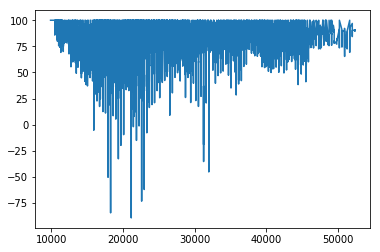

In [71]:
ncwp = create_dataset('_nc_degree',True)
ncwp['2015'].plot();

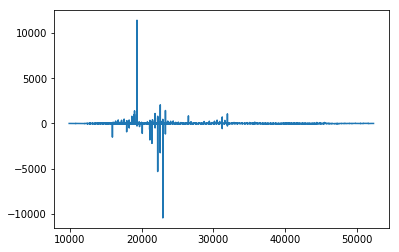

In [72]:
ncwp['SSP1'].plot();

In [73]:
ncwp.head(5)

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
9925,100.0,0.0,0.0,0.0,26.0,62.0,25.0,62.0,25.0,63.0,26.0,63.0,26.0,62.0
9926,100.0,0.0,0.0,0.0,27.0,62.0,26.0,62.0,26.0,63.0,27.0,63.0,27.0,62.0
9927,100.0,0.0,0.0,0.0,28.0,62.0,27.0,62.0,27.0,63.0,28.0,63.0,28.0,62.0
9928,100.0,0.0,0.0,0.0,29.0,62.0,28.0,62.0,28.0,63.0,29.0,63.0,29.0,62.0
9929,100.0,0.0,0.0,0.0,30.0,62.0,29.0,62.0,29.0,63.0,30.0,63.0,30.0,62.0


In [74]:
ncwp.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000
mean,83.151718,-5.544485,-7.256555,-6.267851,22.192719,20.140496,21.192719,20.140496,21.192719,21.140496,22.192719,21.140496,22.192719,20.140496
std,15.127435,152.311138,152.001630,153.029261,79.715973,28.902782,79.715973,28.902782,79.715973,28.902782,79.715973,28.902782,79.715973,28.902782
min,-89.357738,-10451.876279,-10376.116885,-10604.530918,-137.000000,-56.000000,-138.000000,-56.000000,-138.000000,-55.000000,-137.000000,-55.000000,-137.000000,-56.000000
25%,77.829806,-15.570185,-18.989453,-16.929351,-58.000000,-3.000000,-59.000000,-3.000000,-59.000000,-2.000000,-58.000000,-2.000000,-58.000000,-3.000000
50%,85.540453,-1.230401,-1.683916,-1.458487,29.000000,26.000000,28.000000,26.000000,28.000000,27.000000,29.000000,27.000000,29.000000,26.000000
75%,92.401354,0.628068,0.444468,0.521099,91.000000,45.000000,90.000000,45.000000,90.000000,46.000000,91.000000,46.000000,91.000000,45.000000
max,100.000000,11418.236215,11408.637611,11453.429537,180.000000,62.000000,179.000000,62.000000,179.000000,63.000000,180.000000,63.000000,180.000000,62.000000


## Nitrogen Load

In [75]:
data.columns

Index(['water_cur_n_export_degree', 'water_ssp5_n_export_degree',
       'water_cur_n_load_degree', 'water_ssp1_n_load_degree',
       'water_ssp1_n_export_degree', 'water_cur_rural_pop_degree',
       'water_ssp5_n_load_degree', 'water_ssp5_rural_pop_degree',
       'water_ssp3_n_export_degree', 'water_ssp3_n_load_degree',
       'water_ssp1_rural_pop_degree', 'water_ssp3_rural_pop_degree',
       'water_cur_nc_degree', 'water_cur_c_n_export_degree',
       'water_ssp1_nc_degree', 'water_ssp1_c_n_export_degree',
       'water_ssp3_nc_degree', 'water_ssp3_c_n_export_degree',
       'water_ssp5_nc_degree', 'water_ssp5_c_n_export_degree', 'geometry'],
      dtype='object')

In [76]:
tot_nit = create_dataset('_n_load_degree',False)
tot_nit.head()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
9925,13489.0,0.0,0.0,0.0,26.0,62.0,25.0,62.0,25.0,63.0,26.0,63.0,26.0,62.0
9926,50799.0,0.0,0.0,0.0,27.0,62.0,26.0,62.0,26.0,63.0,27.0,63.0,27.0,62.0
9927,50799.0,0.0,0.0,0.0,28.0,62.0,27.0,62.0,27.0,63.0,28.0,63.0,28.0,62.0
9928,50799.0,0.0,0.0,0.0,29.0,62.0,28.0,62.0,28.0,63.0,29.0,63.0,29.0,62.0
9929,50799.0,0.0,0.0,0.0,30.0,62.0,29.0,62.0,29.0,63.0,30.0,63.0,30.0,62.0


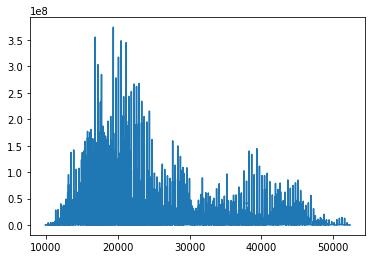

In [77]:
tot_nit['2015'].plot();

In [78]:
tot_nit.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.403600e+04,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000,14036.000000
mean,1.621169e+07,103.029144,135.448805,110.167799,22.192719,20.140496,21.192719,20.140496,21.192719,21.140496,22.192719,21.140496,22.192719,20.140496
std,3.203007e+07,1058.745977,1307.976680,1207.974843,79.715973,28.902782,79.715973,28.902782,79.715973,28.902782,79.715973,28.902782,79.715973,28.902782
min,2.000000e+00,-90.993599,-92.286612,-89.994782,-137.000000,-56.000000,-138.000000,-56.000000,-138.000000,-55.000000,-137.000000,-55.000000,-137.000000,-56.000000
25%,1.523658e+06,-6.066961,-0.342517,-6.686488,-58.000000,-3.000000,-59.000000,-3.000000,-59.000000,-2.000000,-58.000000,-2.000000,-58.000000,-3.000000
50%,5.599258e+06,0.101818,5.839490,0.088591,29.000000,26.000000,28.000000,26.000000,28.000000,27.000000,29.000000,27.000000,29.000000,26.000000
75%,1.289519e+07,42.297525,56.466363,40.716108,91.000000,45.000000,90.000000,45.000000,90.000000,46.000000,91.000000,46.000000,91.000000,45.000000
max,3.742737e+08,74824.317235,71637.942719,80405.997245,180.000000,62.000000,179.000000,62.000000,179.000000,63.000000,180.000000,63.000000,180.000000,62.000000


## Nitrogen Export

In [79]:
nit_exp = create_dataset('_n_export_degree',False)
nit_exp.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.278300e+04,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000
mean,5.625757e+06,1.718468,16.752564,5.374281,23.528906,19.913479,22.528906,19.913479,22.528906,20.913479,23.528906,20.913479,23.528906,19.913479
std,1.066453e+07,483.285660,484.679672,484.391997,78.718664,28.403785,78.718664,28.403785,78.718664,28.403785,78.718664,28.403785,78.718664,28.403785
min,3.702593e-01,-99.817752,-99.833008,-99.858768,-137.000000,-56.000000,-138.000000,-56.000000,-138.000000,-55.000000,-137.000000,-55.000000,-137.000000,-56.000000
25%,8.713422e+05,-27.191768,-17.184105,-23.569504,-56.000000,-3.000000,-57.000000,-3.000000,-57.000000,-2.000000,-56.000000,-2.000000,-56.000000,-3.000000
50%,2.376432e+06,-2.425722,3.037659,-1.278142,30.000000,26.000000,29.000000,26.000000,29.000000,27.000000,30.000000,27.000000,30.000000,26.000000
75%,5.851002e+06,9.363264,26.845600,13.130838,91.000000,44.500000,90.000000,44.500000,90.000000,45.500000,91.000000,45.500000,91.000000,44.500000
max,1.714816e+08,54180.560303,54179.095459,54237.902832,180.000000,60.000000,179.000000,60.000000,179.000000,61.000000,180.000000,61.000000,180.000000,60.000000


## Rural Population:

In [80]:
name = 'rural_pop'
rural_pop = create_dataset('_'+name+'_degree',False)
rural_pop.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.194500e+04,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000
mean,3.578228e+05,-17.530759,25.358817,-12.547360,23.068313,19.845040,22.068313,19.845040,22.068313,20.845040,23.068313,20.845040,23.068313,19.845040
std,9.718245e+05,49.602397,69.775277,53.881336,76.597507,27.648518,76.597507,27.648518,76.597507,27.648518,76.597507,27.648518,76.597507,27.648518
min,5.443365e-04,-100.000000,-100.000000,-100.000000,-136.000000,-56.000000,-137.000000,-56.000000,-137.000000,-55.000000,-136.000000,-55.000000,-136.000000,-56.000000
25%,8.232419e+03,-50.652542,-21.539188,-49.787645,-53.000000,-2.000000,-54.000000,-2.000000,-54.000000,-1.000000,-53.000000,-1.000000,-53.000000,-2.000000
50%,5.469153e+04,-19.500819,5.983304,-18.356717,29.000000,26.000000,28.000000,26.000000,28.000000,27.000000,29.000000,27.000000,29.000000,26.000000
75%,2.488621e+05,5.694707,60.483578,18.893094,86.000000,44.000000,85.000000,44.000000,85.000000,45.000000,86.000000,45.000000,86.000000,44.000000
max,1.667823e+07,191.608588,369.930254,191.608588,180.000000,62.000000,179.000000,62.000000,179.000000,63.000000,180.000000,63.000000,180.000000,62.000000


In [81]:
rural_pop = rural_pop.replace([np.inf, -np.inf], [1000,-1000])
rural_pop.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.194500e+04,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000,11945.000000
mean,3.578228e+05,-17.530759,25.358817,-12.547360,23.068313,19.845040,22.068313,19.845040,22.068313,20.845040,23.068313,20.845040,23.068313,19.845040
std,9.718245e+05,49.602397,69.775277,53.881336,76.597507,27.648518,76.597507,27.648518,76.597507,27.648518,76.597507,27.648518,76.597507,27.648518
min,5.443365e-04,-100.000000,-100.000000,-100.000000,-136.000000,-56.000000,-137.000000,-56.000000,-137.000000,-55.000000,-136.000000,-55.000000,-136.000000,-56.000000
25%,8.232419e+03,-50.652542,-21.539188,-49.787645,-53.000000,-2.000000,-54.000000,-2.000000,-54.000000,-1.000000,-53.000000,-1.000000,-53.000000,-2.000000
50%,5.469153e+04,-19.500819,5.983304,-18.356717,29.000000,26.000000,28.000000,26.000000,28.000000,27.000000,29.000000,27.000000,29.000000,26.000000
75%,2.488621e+05,5.694707,60.483578,18.893094,86.000000,44.000000,85.000000,44.000000,85.000000,45.000000,86.000000,45.000000,86.000000,44.000000
max,1.667823e+07,191.608588,369.930254,191.608588,180.000000,62.000000,179.000000,62.000000,179.000000,63.000000,180.000000,63.000000,180.000000,62.000000


## Quantiles:

In [82]:
quantile_values = 5 * np.arange(1,21)

quantiles = pd.DataFrame()
for q in quantile_values:
    quantiles.loc['nc_degree',str(q)] =q
    quantiles.loc['tot_nit',str(q)] = tot_nit['2015'].quantile(q/100)
    quantiles.loc['nit_exp',str(q)] = nit_exp['2015'].quantile(q/100)
    quantiles.loc['rural_pop',str(q)] = rural_pop['2015'].quantile(q/100)
quantiles

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
nc_degree,5.000000,10.000000,15.000000,20.000000,2.500000e+01,3.000000e+01,3.500000e+01,4.000000e+01,4.500000e+01,5.000000e+01,5.500000e+01,6.000000e+01,6.500000e+01,7.000000e+01,7.500000e+01,8.000000e+01,8.500000e+01,9.000000e+01,9.500000e+01,100.0
tot_nit,50799.000000,111441.000000,245515.847656,502414.250000,1.523658e+06,2.695106e+06,3.409592e+06,3.937435e+06,4.713298e+06,5.599258e+06,6.484185e+06,7.303156e+06,8.383025e+06,1.006278e+07,1.289519e+07,1.820864e+07,2.857950e+07,4.477311e+07,7.584716e+07,374273728.0
nit_exp,83883.735938,293976.568750,460476.153125,631263.437500,8.713422e+05,1.135757e+06,1.391722e+06,1.681403e+06,2.021222e+06,2.376432e+06,2.767968e+06,3.266414e+06,3.921774e+06,4.732930e+06,5.851002e+06,7.197402e+06,9.316843e+06,1.257178e+07,2.161675e+07,171481584.0
rural_pop,264.996057,1333.773779,2668.558984,4948.509277,8.232419e+03,1.231927e+04,1.833678e+04,2.669535e+04,3.806808e+04,5.469153e+04,7.563550e+04,1.029742e+05,1.363282e+05,1.830951e+05,2.488621e+05,3.478350e+05,4.948102e+05,8.213804e+05,1.823346e+06,16678228.0


In [83]:
quantiles.to_csv('../Data/water_quantiles.csv', sep=',')

# 2D Scale for Data Global

In [93]:
data_water_2d = nit_exp[['lat1','long1','lat2','long2','lat3','long3','lat4','long4','lat5','long5','2015']].copy()
data_water_2d = data_water_2d.rename(columns={'2015': 'UN_cur'})
data_water_2d['NCP_cur'] = ncwp['2015'].copy()
data_water_2d['population'] = rural_pop['2015'].copy()
data_water_2d.head()

,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5,UN_cur,NCP_cur,population
10512,-107.0,60.0,-108.0,60.0,-108.0,61.0,-107.0,61.0,-107.0,60.0,31688.421875,87.878273,NaN
10513,-106.0,60.0,-107.0,60.0,-107.0,61.0,-106.0,61.0,-106.0,60.0,83769.773438,91.377363,NaN
10514,-105.0,60.0,-106.0,60.0,-106.0,61.0,-105.0,61.0,-105.0,60.0,54714.484375,96.125323,NaN
10515,-104.0,60.0,-105.0,60.0,-105.0,61.0,-104.0,61.0,-104.0,60.0,127778.242188,90.987379,NaN
10516,-103.0,60.0,-104.0,60.0,-104.0,61.0,-103.0,61.0,-103.0,60.0,165466.015625,85.788301,NaN


In [96]:
data_water_2d = data_water_2d.fillna(0)

In [97]:
data_water_2d.to_csv('../Data/data_water_2d.csv', sep=',')